# Demo: Normal Distribution of Stock Ticker Data

This program retrieves stock price data using the Alpaca API and plots the data using Pandas. These plots demonstrate the distribution of daily stock closing prices compared to the expected normal probability distribution. 

## Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

ModuleNotFoundError: No module named 'alpaca_trade_api'

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

## Get 1 Year's Worth of Stock Price Data via Alpaca API Call and Read in as DataFrame 

In [3]:
# Set the Tesla and Coca-Cola tickers
ticker = ["TSLA","KO"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for Tesla and Coca-Cola
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head(10)

KO                                     TSLA  \
                            open     high    low  close    volume    open   
2019-05-01 00:00:00-04:00  48.95  49.0750  48.55  48.58   8497194  239.00   
2019-05-02 00:00:00-04:00  48.53  48.7657  48.27  48.40   7045641  245.52   
2019-05-03 00:00:00-04:00  48.60  48.9600  48.52  48.72   5839237  243.86   
2019-05-06 00:00:00-04:00  48.33  48.6100  48.26  48.48   6740245  250.10   
2019-05-07 00:00:00-04:00  48.23  48.2900  47.77  48.00   8795261  256.80   
2019-05-08 00:00:00-04:00  48.05  48.2300  47.82  47.85   7457062  246.94   
2019-05-09 00:00:00-04:00  47.80  47.9800  47.07  47.40   9460182  242.00   
2019-05-10 00:00:00-04:00  47.41  48.2950  47.40  48.20   7864053  239.75   
2019-05-13 00:00:00-04:00  47.91  48.1300  47.73  48.05   8533003  232.01   
2019-05-14 00:00:00-04:00  48.53  49.3200  48.35  48.68  11258616  229.30   

                                                                  
                               high       low    close    volume  
2019-05-01 00:00:00-04:00  240.0000  231.5000  234.010  10324457  
2019-05-02 00:00:00-04:00  247.1300  237.7200  244.080  14881930  
2019-05-03 00:00:00-04:00  256.6100  243.4900  255.040  21063497  
2019-05-06 00:00:00-04:00  258.3499  248.5000  255.335   9546203  
2019-05-07 00:00:00-04:00  257.2100  245.1000  247.060   9542822  
2019-05-08 00:00:00-04:00  250.5990  244.2000  244.760   5757805  
2019-05-09 00:00:00-04:00  243.6800  236.9434  241.980   6455536  
2019-05-10 00:00:00-04:00  241.9900  236.0200  239.510   6716345  
2019-05-13 00:00:00-04:00  232.4700  224.5000  227.010  10159046  
2019-05-14 00:00:00-04:00  234.5000  228.0000  232.120   6820595

## Pick closing prices and compute the daily returns

In [4]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices["KO"] = df_ticker["KO"]["close"]
df_closing_prices["TSLA"] = df_ticker["TSLA"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

,KO,TSLA
2019-05-02,-0.003705,0.043032
2019-05-03,0.006612,0.044903
2019-05-06,-0.004926,0.001157
2019-05-07,-0.009901,-0.032408
2019-05-08,-0.003125,-0.009309
2019-05-09,-0.009404,-0.011358
2019-05-10,0.016878,-0.010207
2019-05-13,-0.003112,-0.052190
2019-05-14,0.013111,0.022510
2019-05-15,0.010682,-0.000862


In [5]:
# Generate descriptive statistics
df_daily_returns.describe()

,KO,TSLA
count,253.000000,253.000000
mean,-0.000058,0.005518
std,0.019496,0.048448
min,-0.096821,-0.185317
25%,-0.006757,-0.011358
50%,0.000192,0.004117
75%,0.006626,0.024267
max,0.063191,0.199545


### Plot Distributions

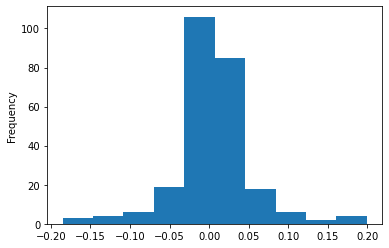

In [6]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
df_daily_returns["TSLA"].plot.hist()

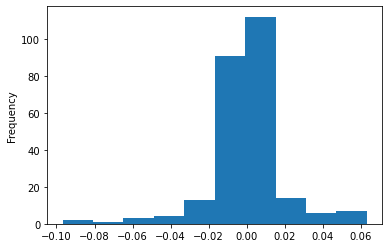

In [7]:
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
df_daily_returns["KO"].plot.hist()

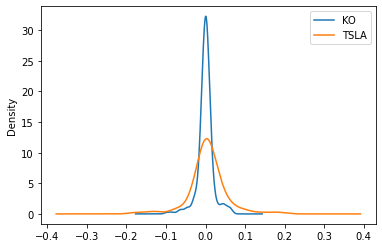

In [8]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot
df_daily_returns.plot.density()